In [ ]:
# import all the necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU
from sklearn.metrics import accuracy_score
import numpy as np
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
import keras.utils as utils
from keras import layers, models
from keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Activation
from keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
heart_csv_path = "/content/heart.csv"

data = pd.read_csv(heart_csv_path)

print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


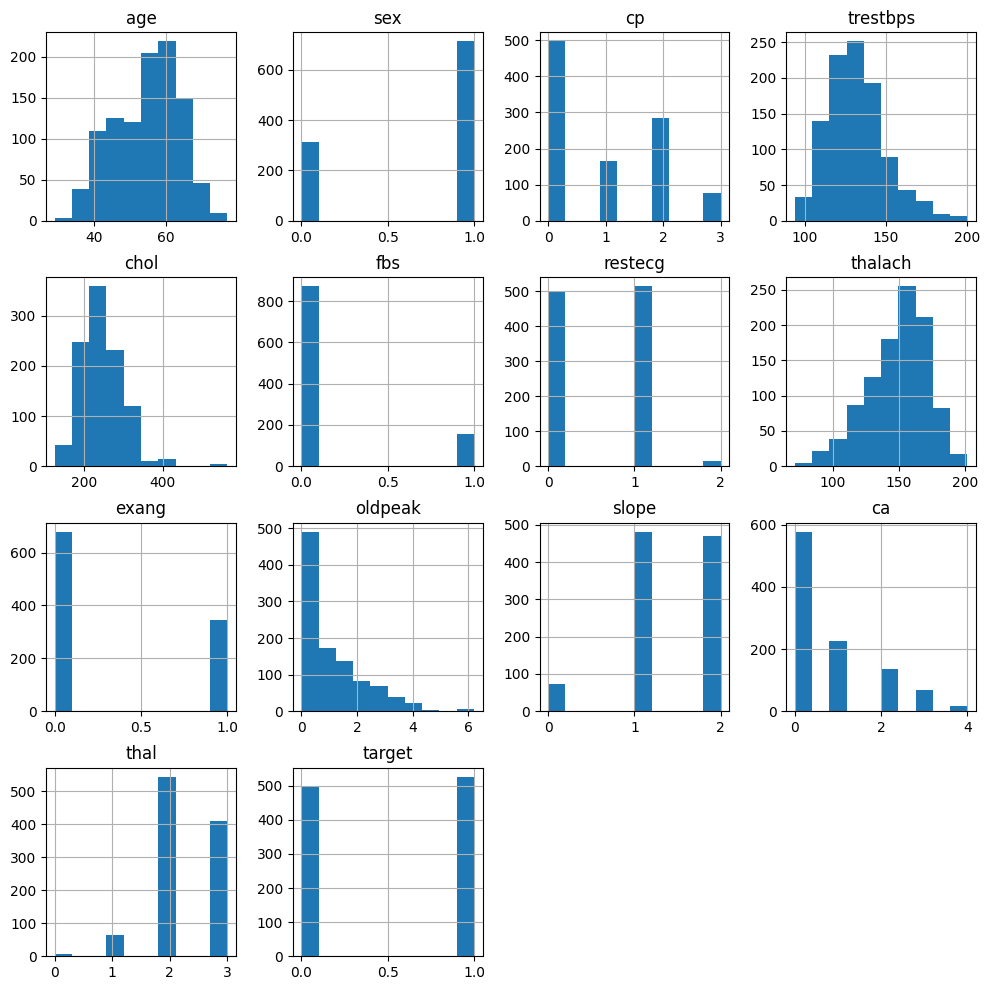

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [ ]:
data.isnull().sum()
x = data.loc[:,data.columns!='target']
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=2)
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (768, 13)
X_test shape: (257, 13)
y_train shape: (768,)
y_test shape: (257,)


Epoch 1/300
24/24 - 2s - loss: 9.9557 - accuracy: 0.5273 - 2s/epoch - 84ms/step
Epoch 2/300
24/24 - 0s - loss: 3.1687 - accuracy: 0.4987 - 48ms/epoch - 2ms/step
Epoch 3/300
24/24 - 0s - loss: 1.6202 - accuracy: 0.5091 - 45ms/epoch - 2ms/step
Epoch 4/300
24/24 - 0s - loss: 1.1386 - accuracy: 0.4818 - 42ms/epoch - 2ms/step
Epoch 5/300
24/24 - 0s - loss: 1.0369 - accuracy: 0.4648 - 44ms/epoch - 2ms/step
Epoch 6/300
24/24 - 0s - loss: 0.8250 - accuracy: 0.5026 - 44ms/epoch - 2ms/step
Epoch 7/300
24/24 - 0s - loss: 0.8842 - accuracy: 0.4674 - 41ms/epoch - 2ms/step
Epoch 8/300
24/24 - 0s - loss: 0.8082 - accuracy: 0.5065 - 42ms/epoch - 2ms/step
Epoch 9/300
24/24 - 0s - loss: 0.8126 - accuracy: 0.5234 - 45ms/epoch - 2ms/step
Epoch 10/300
24/24 - 0s - loss: 0.7625 - accuracy: 0.5195 - 42ms/epoch - 2ms/step
Epoch 11/300
24/24 - 0s - loss: 0.7739 - accuracy: 0.5378 - 69ms/epoch - 3ms/step
Epoch 12/300
24/24 - 0s - loss: 0.7564 - accuracy: 0.5273 - 43ms/epoch - 2ms/step
Epoch 13/300
24/24 - 0s - 

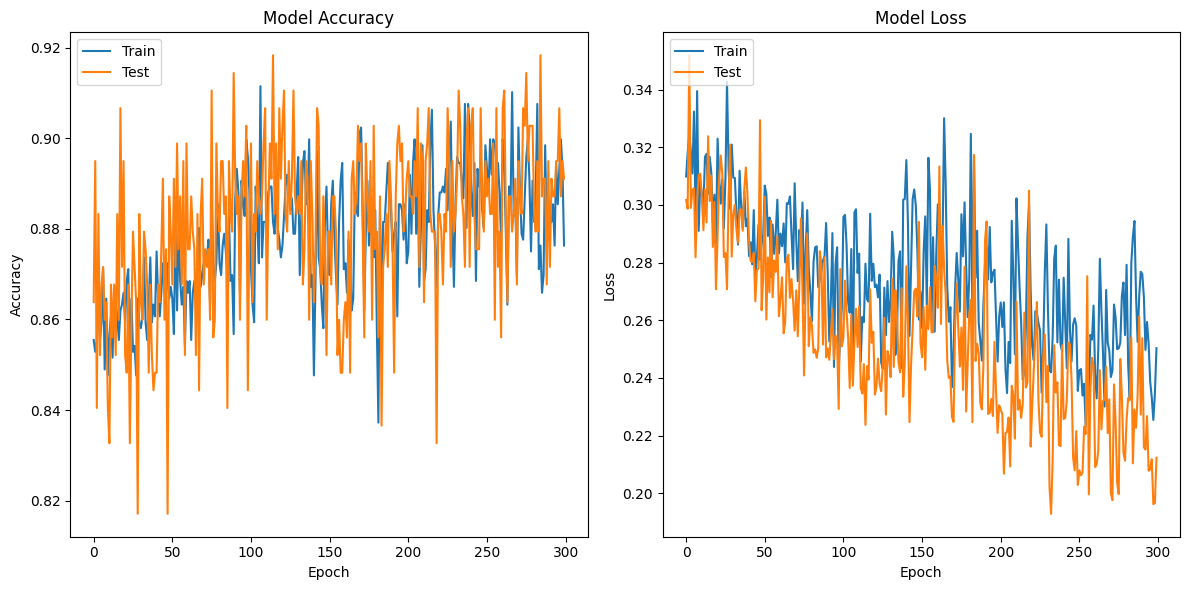

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have x_train and y_train for training, x_test and y_test for evaluation

# Neural Network for Feature Extraction
nn_model = Sequential()
nn_model.add(Dense(128, input_shape=(13,), activation='relu'))
nn_model.add(Dropout(0.25))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.25))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.25))
nn_model.add(Dropout(0.25))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network
nn_model.fit(x_train, y_train, epochs=300, verbose=2)
# Train the Neural Network
history = nn_model.fit(x_train, y_train, epochs=300, verbose=2, validation_data=(x_test, y_test))

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming forest_model is your trained Random Forest model

# Predict with Random Forest on the test set
y_predicted = nn_model.predict(x_test)

# Convert predicted probabilities to binary predictions based on a threshold (0.5 in this case)
y_predicted_binary = (y_predicted > 0.5)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_predicted_binary)

# Calculate metrics
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1]) / total
precision = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
recall = sensitivity
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print('Confusion Matrix:')
print(conf_mat)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall (Sensitivity):', recall)
print('F1 Score:', f1_score)


9/9 [==============================] - 0s 2ms/step
Confusion Matrix:
[[119  19]
 [  9 110]]
Specificity: 0.8527131782945736
Sensitivity: 0.9296875
Accuracy: 0.8910505836575876
Precision: 0.8623188405797102
Recall (Sensitivity): 0.9296875
F1 Score: 0.8947368421052632


9/9 [==============================] - 0s 3ms/step
Accuracy on Test Set: 0.8911
Precision on Test Set: 0.8527
Recall on Test Set: 0.9244
F1 Score on Test Set: 0.8871


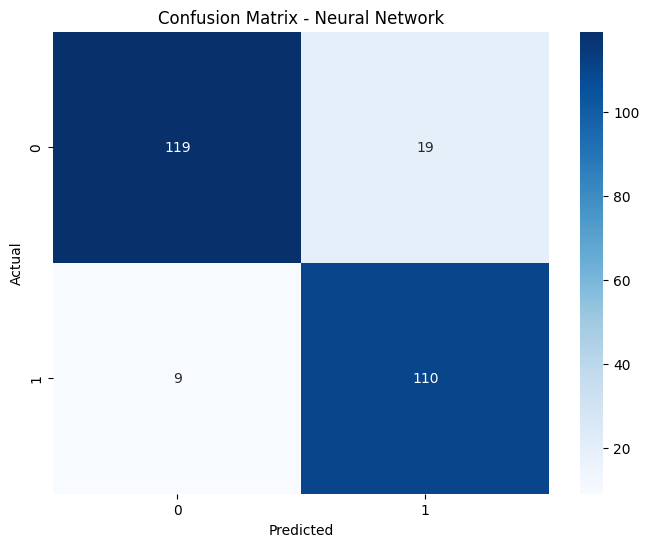

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming nn_model is your trained neural network model

# Predict with Neural Network on the test set
nn_predictions_test = nn_model.predict(x_test)

# Convert predicted probabilities to binary predictions based on a threshold (0.5 in this case)
nn_predictions_binary = (nn_predictions_test > 0.5)

# Calculate metrics
accuracy_test = accuracy_score(y_test, nn_predictions_binary)
precision_test = precision_score(y_test, nn_predictions_binary)
recall_test = recall_score(y_test, nn_predictions_binary)
f1_test = f1_score(y_test, nn_predictions_binary)

# Print metrics
print(f'Accuracy on Test Set: {accuracy_test:.4f}')
print(f'Precision on Test Set: {precision_test:.4f}')
print(f'Recall on Test Set: {recall_test:.4f}')
print(f'F1 Score on Test Set: {f1_test:.4f}')

# Plot Confusion Matrix
cm = confusion_matrix(y_test, nn_predictions_binary)
classes = np.unique(y_test)

# Plot as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
